## NGO Data Clustering And PCA


## Reading and Understanding the Data

In [1]:
#import all the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# To Scale our data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# To perform KMeans clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
#importing the dataset
df=pd.read_csv('Country-data.csv')

In [3]:
# Data sample
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
# Null value check for Dataset
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Get a summary of the dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


From the above, we can conclude that data doesn’t have any missing values column wise which also infers that there are no row wise missing values

## Data cleaning

Form the data dictionay we can understand that export, health and import columns are in percentage, so will convert them back to absolute values

In [7]:
#Converting exports,health and imports percentages to absolute values.
df['exports']=(df['gdpp']*df['exports'])/100
df['health']=(df['gdpp']*df['health'])/100
df['imports']=(df['gdpp']*df['imports'])/100

In [8]:
# Data check
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Visualising the Data

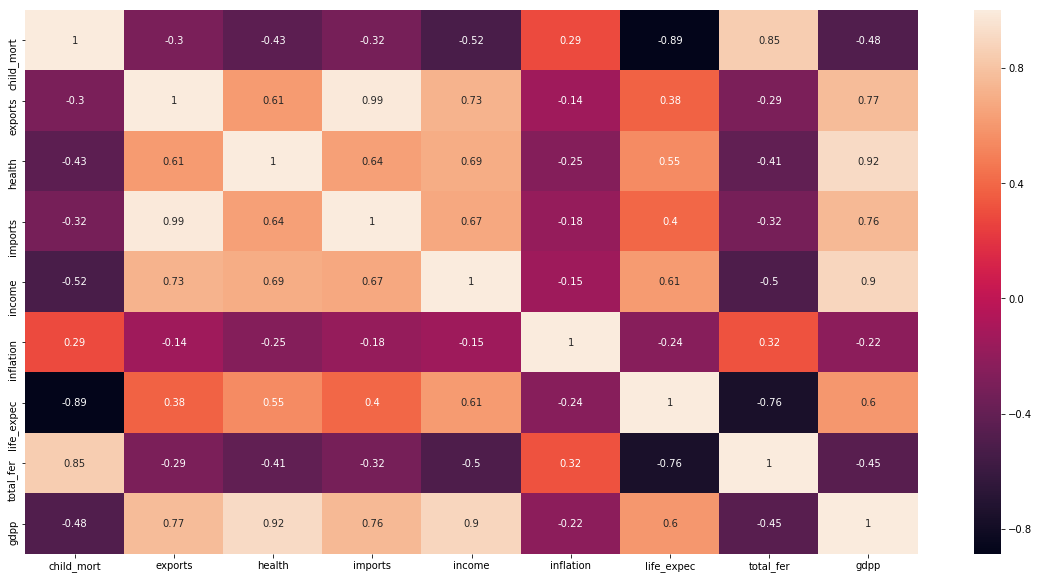

In [9]:
# Visualising the correlation of Numeric Variables by plotting a heatmap
plt.figure(figsize = (20,10))        
sns.heatmap(df.corr(),annot = True)

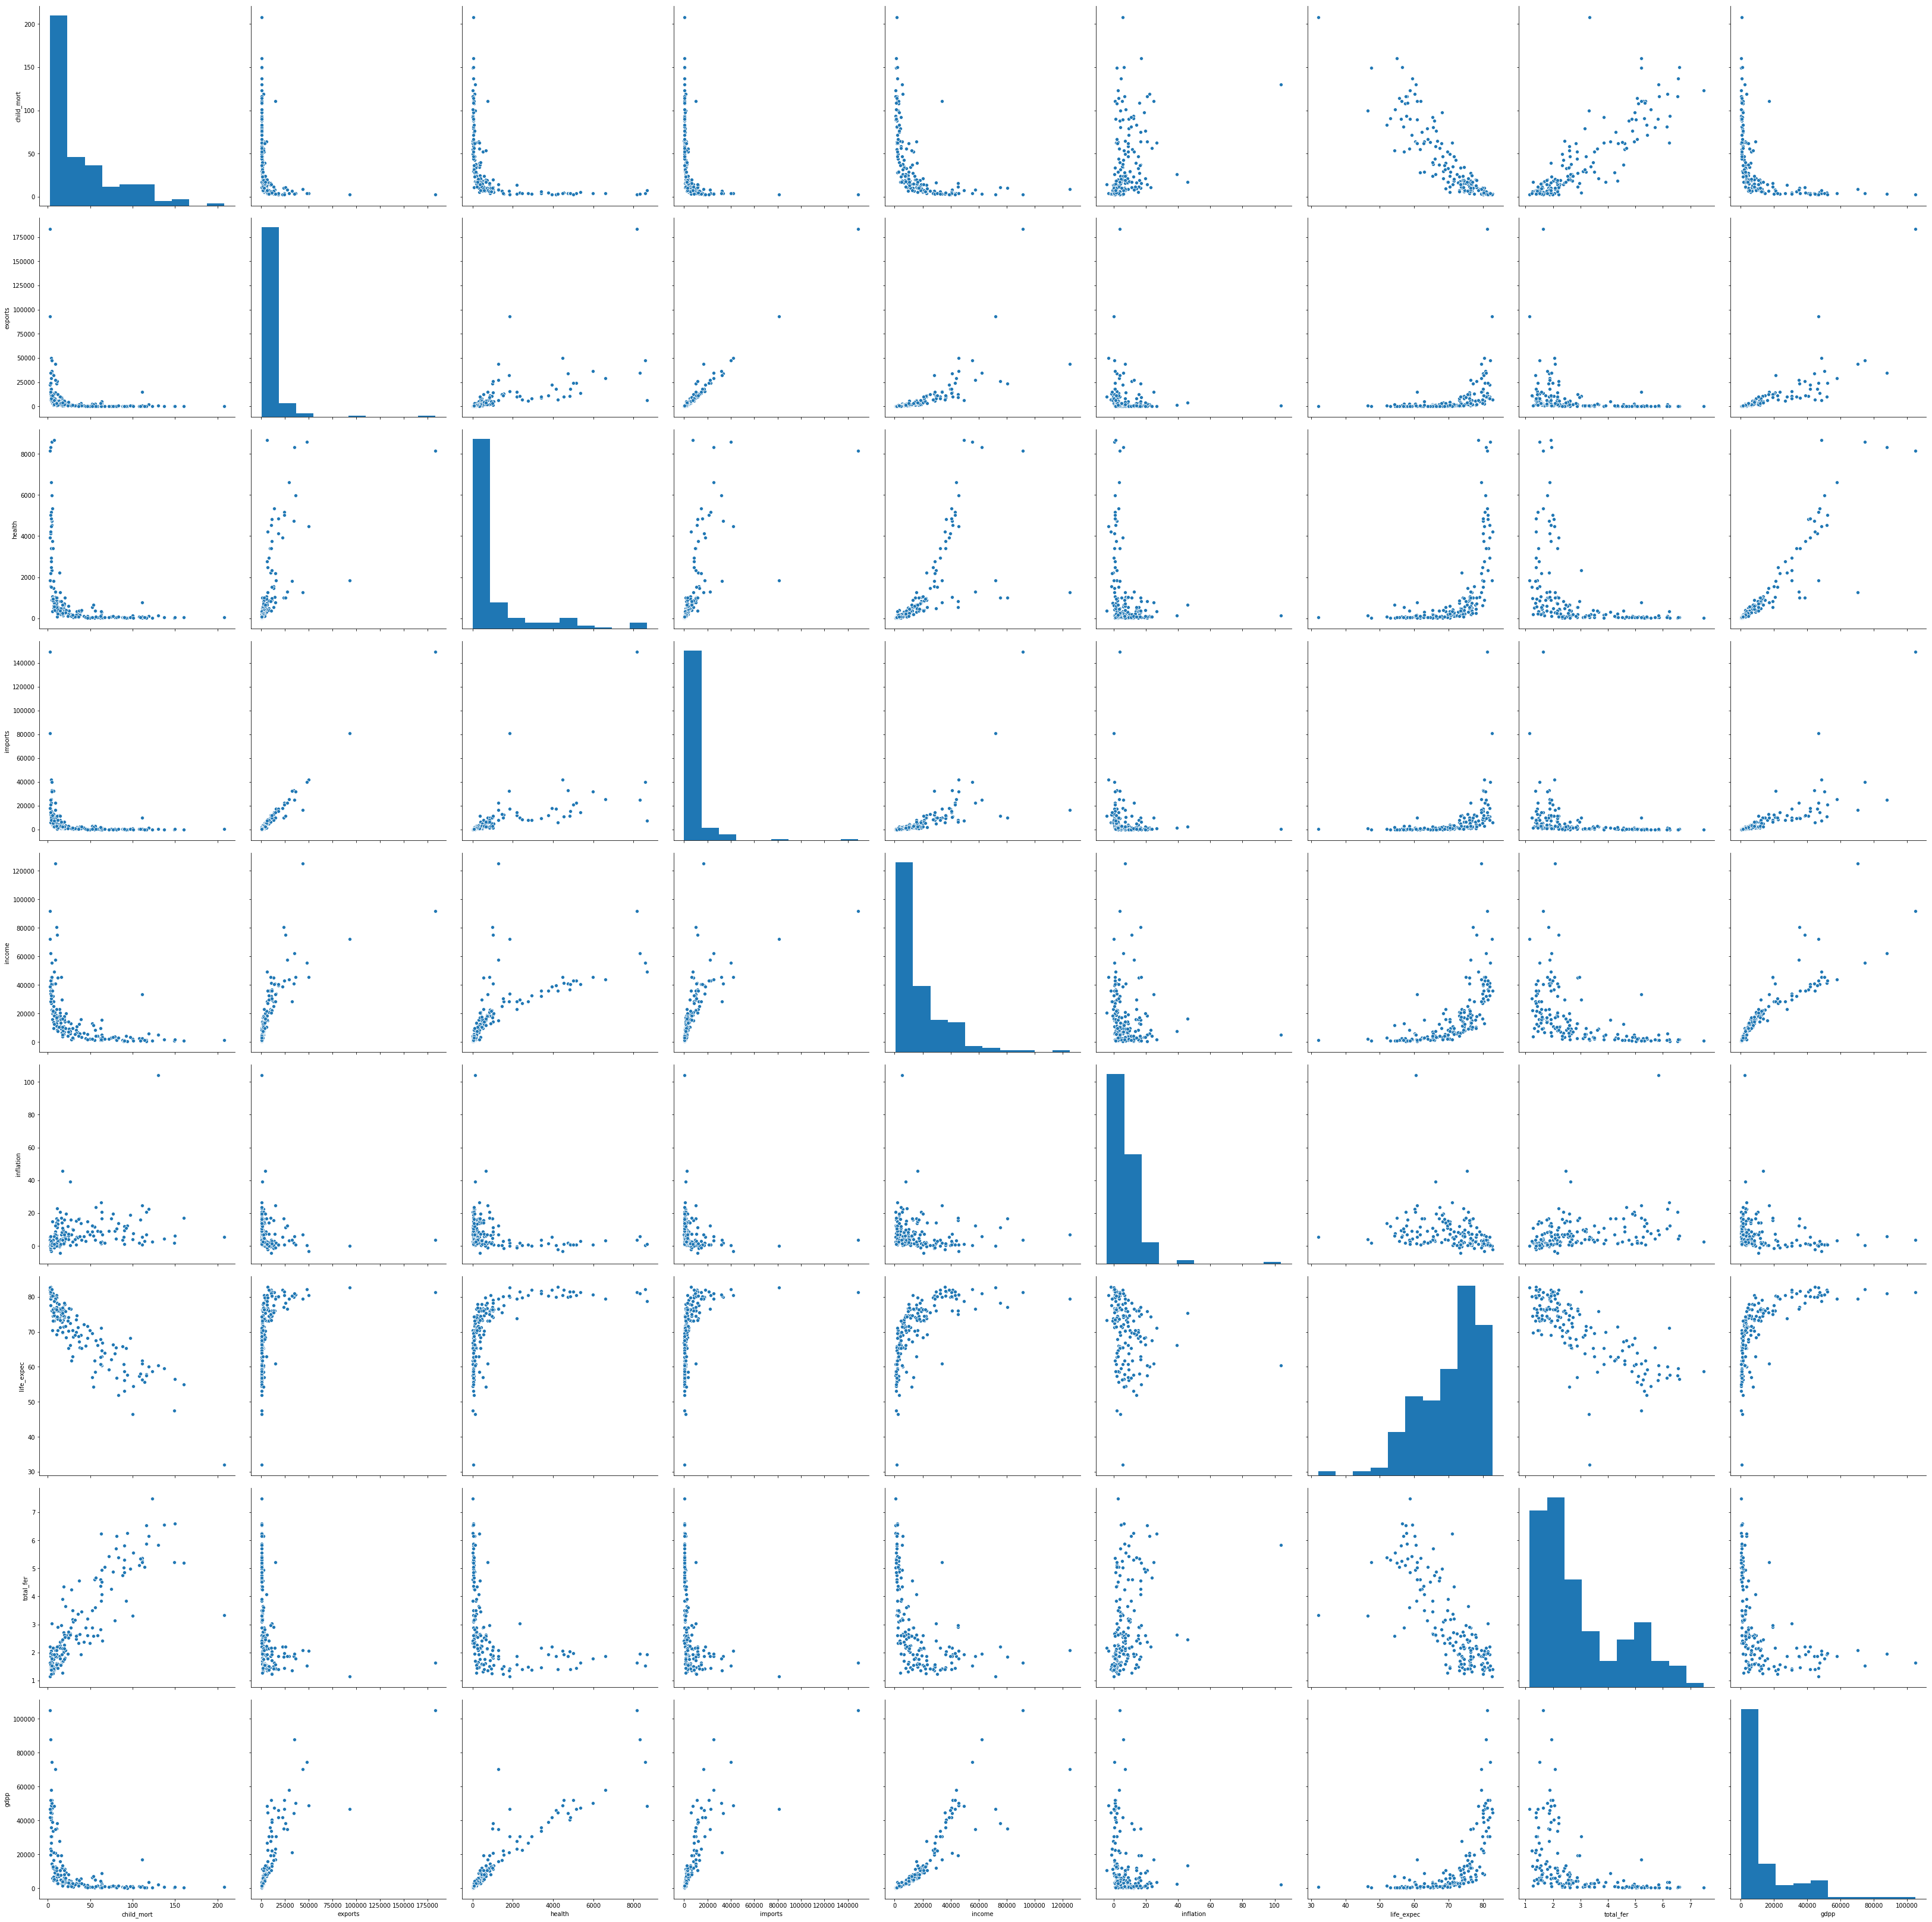

In [10]:
# Visualising Numeric Variables by plotting a pairplot
sns.pairplot(data=df, height=5)

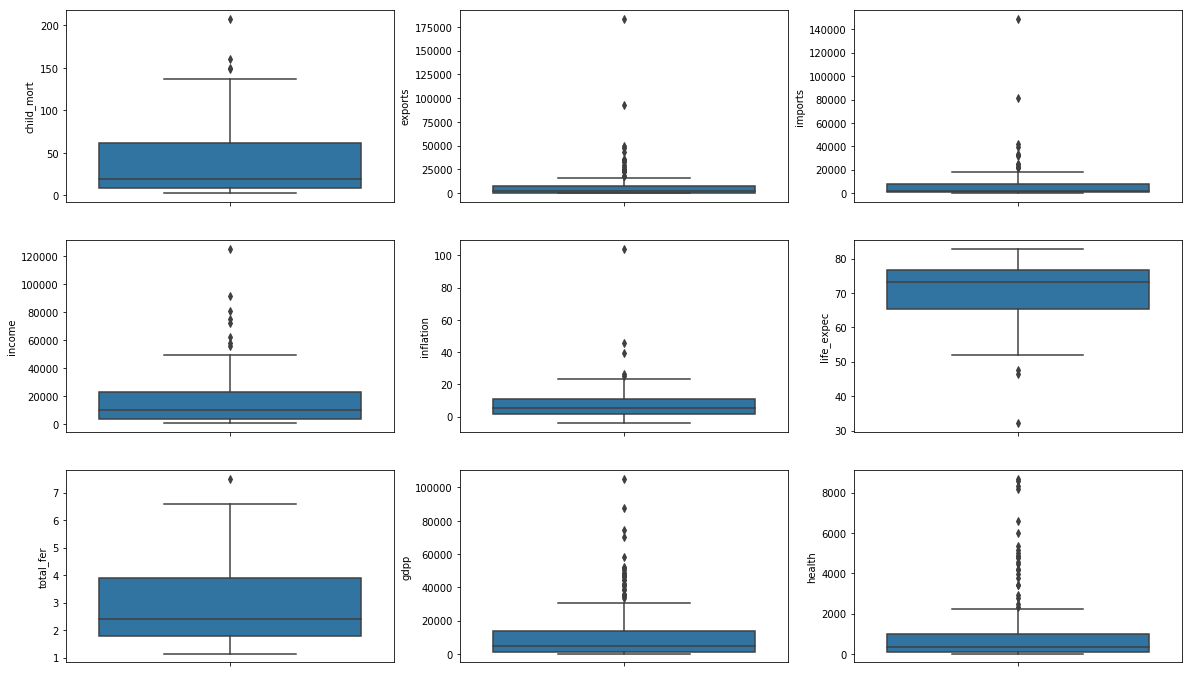

In [11]:
# Plotting the Graph to check the outliers
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(y='child_mort',data=df)
plt.subplot(3,3,2)
sns.boxplot(y='exports',data=df)
plt.subplot(3,3,3)
sns.boxplot(y='imports',data=df)
plt.subplot(3,3,4)
sns.boxplot(y='income',data=df)
plt.subplot(3,3,5)
sns.boxplot(y='inflation',data=df)
plt.subplot(3,3,6)
sns.boxplot(y='life_expec',data=df)
plt.subplot(3,3,7)
sns.boxplot(y='total_fer',data=df)
plt.subplot(3,3,8)
sns.boxplot(y='gdpp',data=df)
plt.subplot(3,3,9)
sns.boxplot(y='health',data=df)

It seems there are outliers in almost all variables but we can’t start treating outliers as we don’t need all the variables for our analysis. So will treat it after we finalize the components after PCA

## Prepare the data for modelling

In [12]:
#The final matrix would only contain the data columns. Hence let's drop the country column
Required_df=df.drop(['country'],axis=1)
Required_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
#Rescaling data for PCA
scaler = StandardScaler()
Scaled_df = scaler.fit_transform(Required_df)
Scaled_df

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## PCA
Trying to identify the non correlated variable 

In [14]:
#PCA module
pca = PCA(random_state=42)

In [15]:
# Applying PCA 
pca.fit(Scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
# PCA Components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [17]:
# PCA variance ratio
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

<BarContainer object of 9 artists>

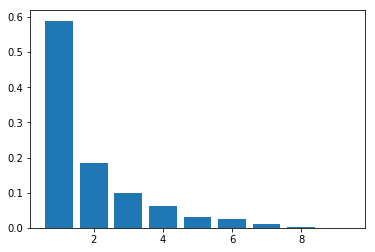

In [18]:
# Plotting bar graph variance_ratio 
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [19]:
# Cummulative Sum of variance_ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

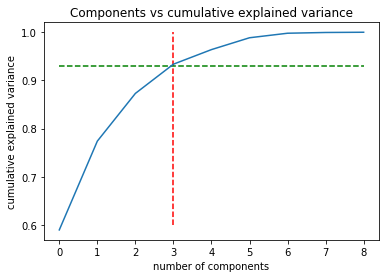

In [20]:
# Graph plot for Cummulative Sum of variance_ratio
fig = plt.figure(figsize = (6,4))
plt.vlines(x=3, ymax=1, ymin=0.6, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Components vs cumulative explained variance' )
plt.show()



From the above graph we can conclude that 93% of data can be expressed using 4 PCA components

`we can also take 5 components as it represents 96% of the data but the more the components more the data we lose while treatig outliers, hence will process with 4 components for our anlaysis`

In [21]:
# Creating dataframe for PCA component
colnames = list(df.drop('country',axis=1).columns)
df_pca_1 = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
df_pca_1

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,exports,0.342887,0.397311,-0.030574,0.449425
2,health,0.358535,0.155053,-0.075703,-0.599712
3,imports,0.344865,0.370781,-0.072174,0.461798
4,income,0.380041,0.128384,0.145764,-0.154806
5,inflation,-0.143085,0.221261,0.948419,-0.007628
6,life_expec,0.343857,-0.369820,0.196752,-0.018395
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928
8,gdpp,0.399988,0.200624,0.010339,-0.364772


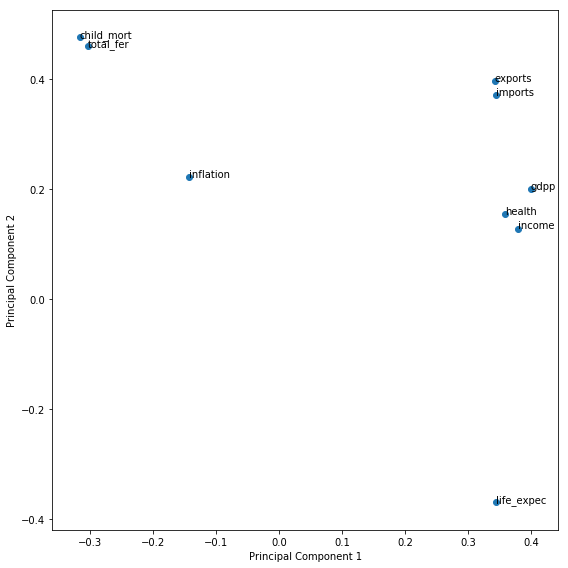

In [22]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca_1.PC1, df_pca_1.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_pca_1.Feature):
    plt.annotate(txt, (df_pca_1.PC1[i],df_pca_1.PC2[i]))
plt.tight_layout()
plt.show()

In [23]:
#Performing PCA with 4 columns
pca = IncrementalPCA(n_components=4)
df_pca = pca.fit_transform(Scaled_df)


In [24]:
# Shape of the PCA
df_pca.shape

(167, 4)

In [25]:
#take the transpose of the PC matrix so that we can create the new matrix
Pca_T = np.transpose(df_pca)

In [26]:
#Creating the correlation among components
corrmat = np.corrcoef(Pca_T)

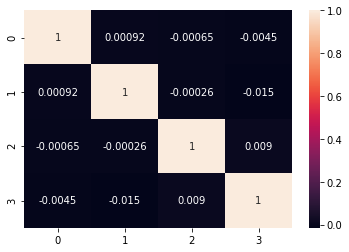

In [27]:
sns.heatmap(corrmat,annot=True)

In [28]:
#Let's create the newer matrix according to the given principal components
rownames = list(df['country'])
Pca_otlr_c = pd.DataFrame({'country':rownames,'PC1':Pca_T[0],'PC2':Pca_T[1],'PC3':Pca_T[2],'PC4':Pca_T[3]})
Pca_otlr=Pca_otlr_c
Pca_otlr.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


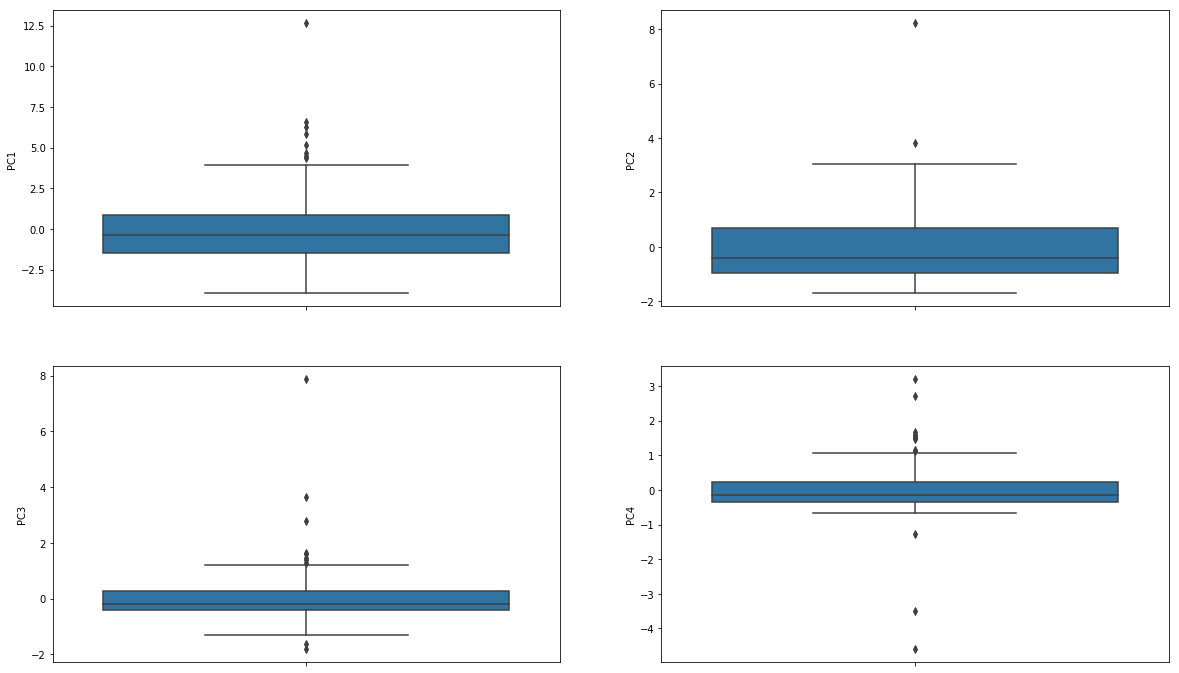

In [29]:
# Plotting the Graph for outlier check of the components 
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.boxplot(y='PC1',data=Pca_otlr)
plt.subplot(2,2,2)
sns.boxplot(y='PC2',data=Pca_otlr)
plt.subplot(2,2,3)
sns.boxplot(y='PC3',data=Pca_otlr)
plt.subplot(2,2,4)
sns.boxplot(y='PC4',data=Pca_otlr)

We clearly see that there are outliers in the components and will try to treate it

`PCA 1 , and 2 will try to remove the max outliers at y-axis as we dont want to take the chance of removing more data and at the same time retain the extreme outliers`

`PCA 3 and 4 will remove outliers using IQR as we see outliers at the both ends`

Text(0.5, 1.0, 'After Removing the Outlier')

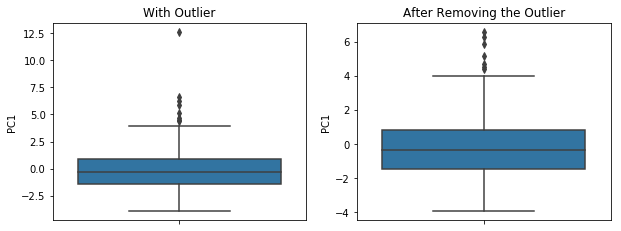

In [30]:
#Removing the max outliers for PCA 1
Pca_otlr = Pca_otlr[Pca_otlr.PC1!=Pca_otlr.PC1.max()]

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(y='PC1',data=Pca_otlr_c)
plt.title('With Outlier')

plt.subplot(2,2,2)
sns.boxplot(y='PC1',data=Pca_otlr)
plt.title('After Removing the Outlier')


Text(0.5, 1.0, 'After Removing the Outlier')

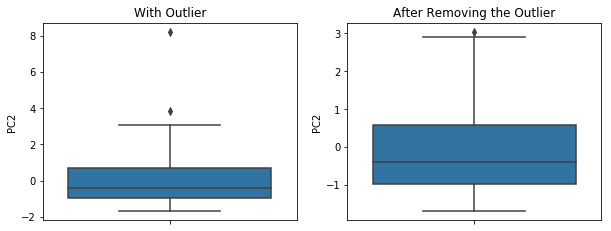

In [31]:
#Removing the max outliers for PCA 2
Pca_otlr = Pca_otlr[Pca_otlr.PC2!=Pca_otlr.PC2.max()]

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(y='PC2',data=Pca_otlr_c)
plt.title('With Outlier')

plt.subplot(2,2,2)
sns.boxplot(y='PC2',data=Pca_otlr)
plt.title('After Removing the Outlier')

Text(0.5, 1.0, 'After Removing the Outlier')

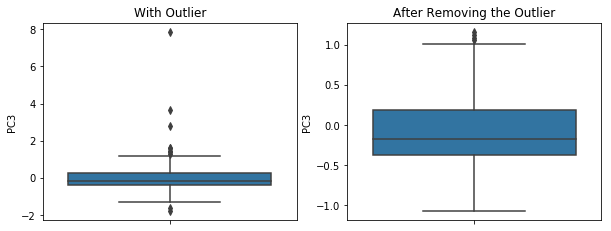

In [32]:
#Will perform IQR for PCA 3 
Q1 = Pca_otlr.PC3.quantile(0.05)
Q3 = Pca_otlr.PC3.quantile(0.95)
IQR = Q3 - Q1
Pca_otlr = Pca_otlr[(Pca_otlr.PC3 >= Q1 ) & (Pca_otlr.PC3 <= Q3)]

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(y='PC3',data=Pca_otlr_c)
plt.title('With Outlier')

plt.subplot(2,2,2)
sns.boxplot(y='PC3',data=Pca_otlr)
plt.title('After Removing the Outlier')

Text(0.5, 1.0, 'After Removing the Outlier')

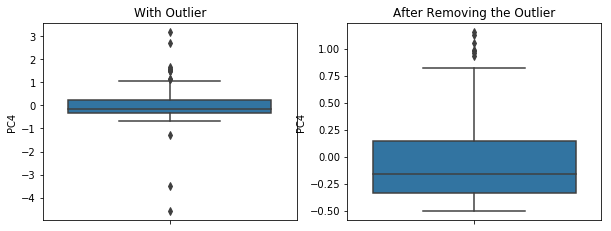

In [33]:
#Will perform IQR for PCA 4
Q1 = Pca_otlr.PC4.quantile(0.05)
Q3 = Pca_otlr.PC4.quantile(0.95)
IQR = Q3 - Q1
Pca_otlr = Pca_otlr[(Pca_otlr.PC4 >= Q1 ) & (Pca_otlr.PC4 <= Q3)]

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.boxplot(y='PC4',data=Pca_otlr_c)
plt.title('With Outlier')

plt.subplot(2,2,2)
sns.boxplot(y='PC4',data=Pca_otlr)
plt.title('After Removing the Outlier')

In [34]:
#Shape after outlier removed
Pca_otlr.shape

(131, 5)

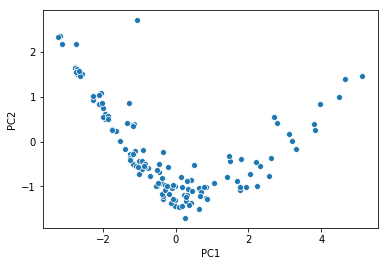

In [35]:
#let's check the spread of the dataset
sns.scatterplot(x='PC1',y='PC2',data=Pca_otlr)

## Modeling

### Finding the Optimal Number of Clusters

Before stating with the clustering model, lets find out the number of optimun cluster we required. For which will use the elbow-curve/SSD

# KMeans Clustering

In [36]:
#Removing the country to perform SSD or Silhouette Analysis
Df_Aftr_OT = Pca_otlr
Df_Scale_AOT = Pca_otlr.drop(['country'],axis=1)

Text(0.5, 1.0, 'elbow-curve/SSD')

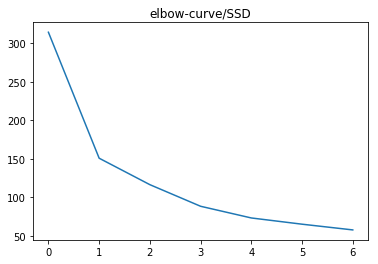

In [37]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Df_Scale_AOT)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.title('elbow-curve/SSD')

So from the above graph, we can see that after 5 clusters the line is evenout 

So now with the help of `Silhouette Analysis`' will try to find out the optimum number of clusters 

In [38]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(Df_Scale_AOT)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Df_Scale_AOT, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.42181519220083663
For n_clusters=3, the silhouette score is 0.5016052959490388
For n_clusters=4, the silhouette score is 0.38987798150315256
For n_clusters=5, the silhouette score is 0.40723674490317974
For n_clusters=6, the silhouette score is 0.3792766080513663
For n_clusters=7, the silhouette score is 0.3924824926028565
For n_clusters=8, the silhouette score is 0.38357303833379147


Based on the above silhouette scores, we cannot conclude with 3 clusters will be appropriate as it has the highest silhouette score but when we form the 3 clusters, we are not able to narrow down the countries which are in need of help.

So, the next cluster is highest silhouette score is 2 but it will give us the same problem again. Hence will go with `4 clusters` which will help us to narrow down but at the same time will try to reduce the similarities between clusters

Note: cluster 4 are 5 are having almost same silhouette score at 39% and 40% respectively but going with 5 clusters is resulting in the countries which are in need of help splitting into two clusters so will go with 4 clusters

In [39]:
# Fixing the number of clusters for k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(Df_Scale_AOT)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_

array([0, 2, 1, 0, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 1, 1, 1, 2, 1, 2, 2, 0,
       0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2, 0, 0, 2,
       1, 3, 0, 0, 2, 3, 0, 3, 2, 1, 0, 1, 3, 1, 1, 2, 1, 3, 3, 3, 2, 1,
       1, 1, 1, 3, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 1, 1, 3, 3, 0, 2, 1, 2, 1, 2, 2, 3, 2, 2, 1, 1, 0, 2, 0, 2, 3,
       1, 1, 2, 3, 2, 0, 1, 3, 1, 0, 1, 2, 2, 1, 0, 3, 3, 2, 1, 1, 0])

In [41]:
#Assigning clusters numbers to the PCA dataframe
Cid_Gen=Df_Aftr_OT
Cid_Gen.index = pd.RangeIndex(len(Cid_Gen.index))
df_Kmean = pd.concat([Cid_Gen, pd.Series(kmeans.labels_)], axis=1)
df_Kmean.columns = ['country', 'PC1', 'PC2','PC3','PC4','cluster_id']
df_Kmean.head()

,country,PC1,PC2,PC3,PC4,cluster_id
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,2
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,2


In [42]:
# Records count as per cluster id
df_Kmean['cluster_id'].value_counts()

2    45
1    40
0    27
3    19
Name: cluster_id, dtype: int64

Text(0.5, 1.0, 'PC1 vs PC2')

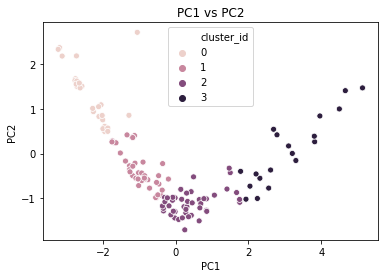

In [43]:
#Will anlayse the relationship between PC1 and PC2
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=df_Kmean)
plt.title('PC1 vs PC2')

Text(0.5, 1.0, 'PC2 vs PC3')

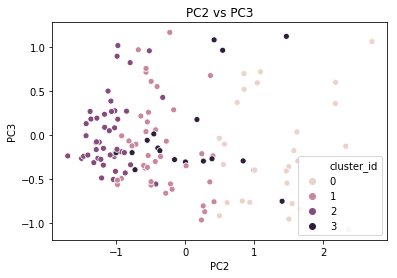

In [44]:
#Will anlayse the relationship between PC2 and PC3
sns.scatterplot(x='PC2',y='PC3',hue='cluster_id',legend='full',data=df_Kmean)
plt.title('PC2 vs PC3')

Text(0.5, 1.0, 'PC3 vs PC4')

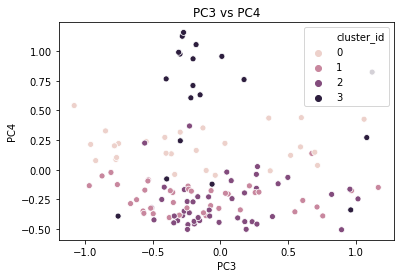

In [45]:
#Will anlayse the relationship between PC3 and PC4
sns.scatterplot(x='PC3',y='PC4',hue='cluster_id',legend='full',data=df_Kmean)
plt.title('PC3 vs PC4')

Text(0.5, 1.0, 'PC4 vs PC1')

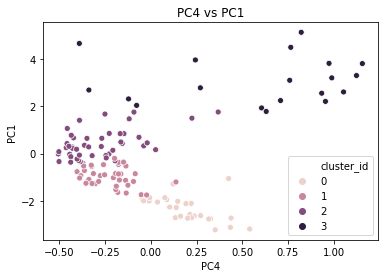

In [46]:
#Will anlayse the relationship between PC4 and PC1
sns.scatterplot(x='PC4',y='PC1',hue='cluster_id',legend='full',data=df_Kmean)
plt.title('PC4 vs PC1')

From the above scatter plot we can conclude that the PCA variables are good to go for our analysis

In [47]:
#One thing we noticed is some even though some distinct clusters are being formed, some are not so good.
#Now let's create the cluster means wrt to the various variables mentioned in the question and plot and see how they are related
Df_Final_1=pd.merge(df,df_Kmean,on='country')
Df_Final=Df_Final_1[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','cluster_id']]
clu_chi = pd.DataFrame(Df_Final.groupby(["cluster_id"]).child_mort.mean())
clu_exp= pd.DataFrame(Df_Final.groupby(["cluster_id"]).exports.mean())
clu_imp = pd.DataFrame(Df_Final.groupby(["cluster_id"]).imports.mean())
clu_hea = pd.DataFrame(Df_Final.groupby(["cluster_id"]).health.mean())
clu_inc = pd.DataFrame(Df_Final.groupby(["cluster_id"]).income.mean())
clu_inf = pd.DataFrame(Df_Final.groupby(["cluster_id"]).inflation.mean())         
clu_lif = pd.DataFrame(Df_Final.groupby(["cluster_id"]).life_expec.mean())
clu_tot = pd.DataFrame(Df_Final.groupby(["cluster_id"]).total_fer.mean())
clu_gdpp = 	pd.DataFrame(Df_Final.groupby(["cluster_id"]).gdpp.mean())

Df_Final_2 = pd.concat([pd.Series([0,1,2,3]),clu_chi,clu_exp,clu_imp,clu_hea,clu_inc,clu_inf,clu_lif,clu_tot,clu_gdpp], axis=1)
Df_Final_2.columns = ["cluster_id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
Df_Final_2

,cluster_id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,93.103704,1071.146407,790.895370,82.428259,3825.222222,12.388889,59.844444,5.291481,1822.037037
1,1,39.890000,1254.293188,1406.429327,190.764273,6886.000000,7.271275,67.865000,3.088750,3138.550000
2,2,12.355556,4437.196889,4719.063556,713.037511,16707.555556,4.630511,75.535556,1.829556,9905.555556
3,3,4.905263,21485.736842,18035.126316,3395.626316,44910.526316,2.519789,80.284211,1.850000,40363.157895


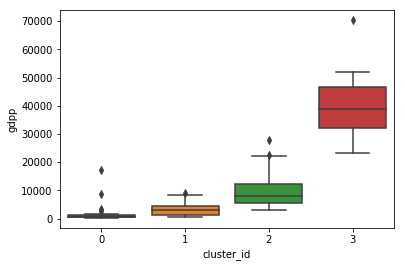

In [48]:
# plotting boxplot to find the relation between cluster id and gdp
sns.boxplot(x='cluster_id', y='gdpp', data=Df_Final)

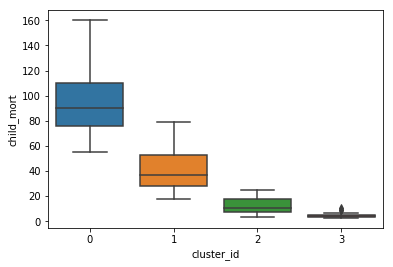

In [49]:
# plotting boxplot to find the relation between cluster id and child_mort
sns.boxplot(x='cluster_id', y='child_mort', data=Df_Final)

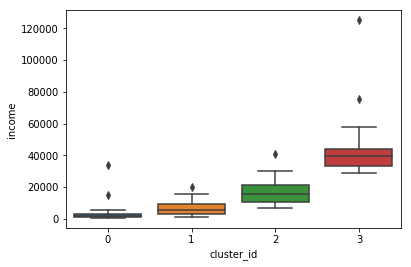

In [50]:
# plotting boxplot to find the relation between cluster id and income
sns.boxplot(x='cluster_id', y='income', data=Df_Final)

Text(0.5, 1.0, 'income vs gdpp')

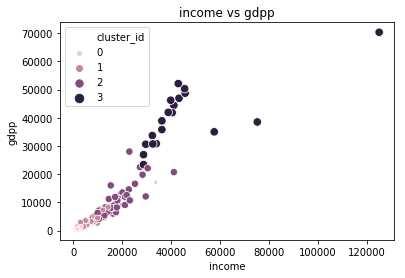

In [51]:
#Let now analyse how the clusters are formed by taking  income vs gdpp
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',size='cluster_id',data=Df_Final)
plt.title('income vs gdpp')

Text(0.5, 1.0, 'gdp vs child_mort')

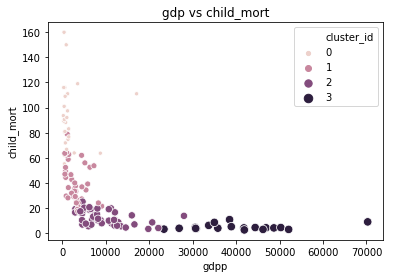

In [52]:
#Let now analyse how the clusters are formed by taking  gdp vs child_mort 
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',size='cluster_id',data=Df_Final)
plt.title('gdp vs child_mort')

Text(0.5, 1.0, 'income vs child_mort')

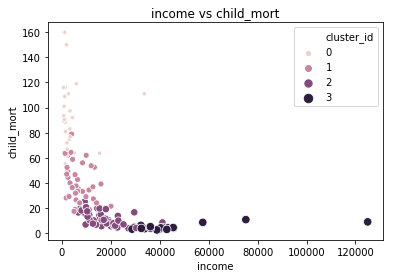

In [53]:
#Let now analyse how the clusters are formed by taking  income vs child_mort
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',size='cluster_id',data=Df_Final)
plt.title('income vs child_mort')

**Observations:**


`plot 1: income vs gdpp` - we can clearly see that both Income and GDP are having linear relationship, the income increase, and the GDP also increase along with it.

`plot 2: gdpp vs child_mort` - We can clearly see that as the GDP of any country increases the child mortality decreases. It is clearly visible with the clusters formed that all the countries with highest child mortality is in one cluster, when the child mortality decrease the cluster is formed a second group and so on with respet to the GDP

`plot 3: income vs child_mort` - We can clearly see that as the Income of any country increases the child mortality decreases. It is clearly visible with the clusters formed that all the countries with highest child mortality is in one cluster, when the child mortality decrease the cluster is formed a second group and so on with respect to the Income

So, based on the observation we can conclude the clusters are formed are good for our further analysis

## Hierarchical Clustering

In [54]:
#Lets get the scaled data to start with
Df_Scale_AOT.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


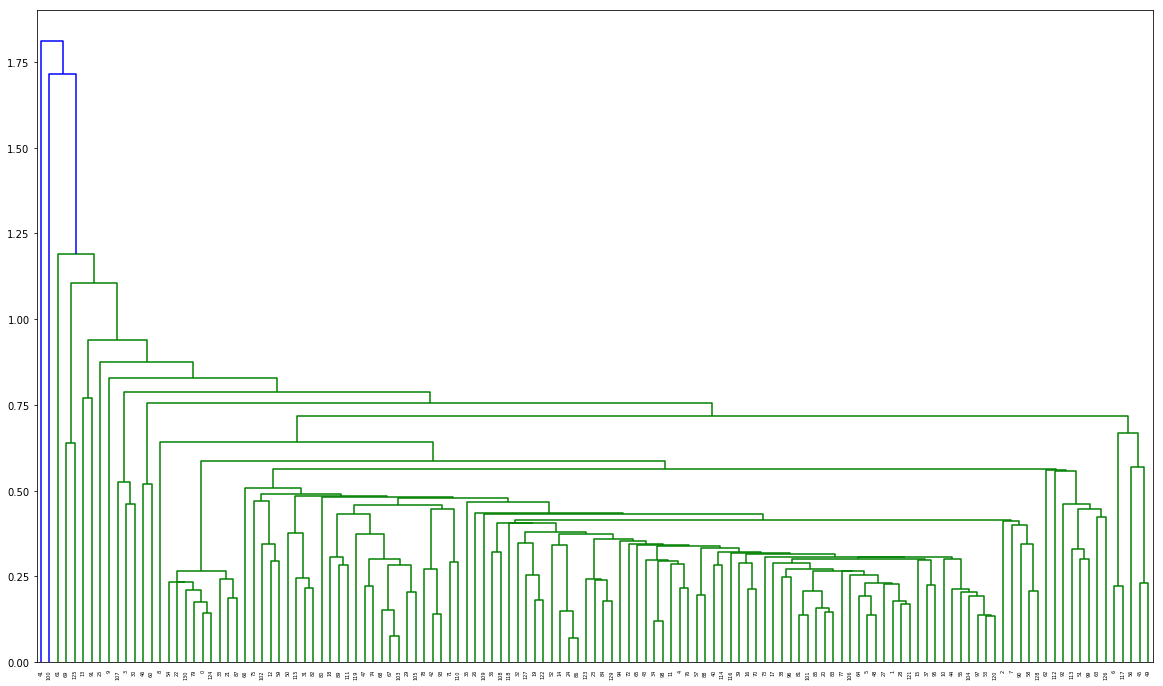

In [55]:
# lets try a single linkage
plt.figure(figsize=(20,12))
mergings = linkage(Df_Scale_AOT, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

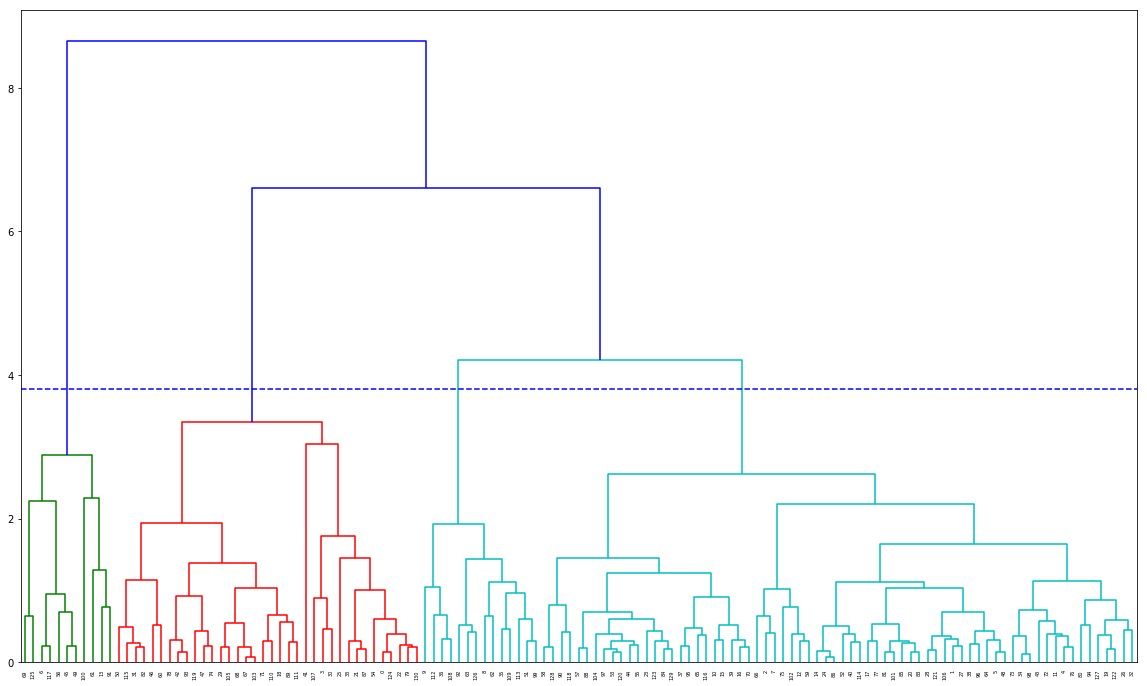

In [56]:
# complete linkage
plt.figure(figsize=(20,12))
mergings = linkage(Df_Scale_AOT, method="complete", metric='euclidean')
dendrogram(mergings)
plt.hlines(y=3.8, xmax=100000, xmin=0, colors="b", linestyles="--")
plt.show()

Based on the above complete linkage plot, will form `4 different clusters`. Creating more than four cluster may result in scattering of the countries which are in need into adjacent group and creating lesser than 4 clusters may bring the countries which are not in need close to the adjacent clusters. so be on safer side, will go with four clusters. 
Also creating same number of clusters in KMeans and Hierarchical will help of analyse countries in both the clusters

In [57]:
# forming 4 clusters by cutting the tree
cluster_labels = pd.Series(cut_tree(mergings, n_clusters=4).reshape(-1, ))

In [58]:
#Assigning clusters numbers to the PCA dataframe
Df_Aftr_OT.index = pd.RangeIndex(len(Df_Aftr_OT.index))
Df_hc = pd.concat([Df_Aftr_OT, cluster_labels], axis=1)
Df_hc.columns = ['country', 'PC1', 'PC2','PC3','PC4','clusterid']
Df_hc.head()

,country,PC1,PC2,PC3,PC4,clusterid
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921,1
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389,1
3,Angola,-2.723581,2.176018,0.597794,0.438919,0
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513,1


Text(0.5, 1.0, 'PC1 vs PC2')

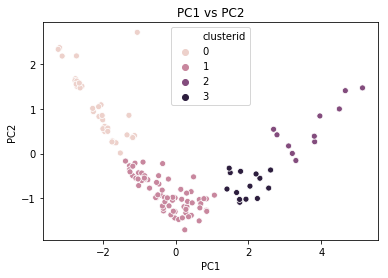

In [59]:
#Will anlayse the relationship between PC1 and PC2
sns.scatterplot(x='PC1',y='PC2',hue='clusterid',legend='full',data=Df_hc)
plt.title('PC1 vs PC2')

Text(0.5, 1.0, 'PC2 vs PC3')

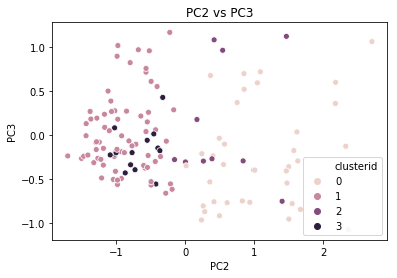

In [60]:
#Will anlayse the relationship between PC2 and PC3
sns.scatterplot(x='PC2',y='PC3',hue='clusterid',legend='full',data=Df_hc)
plt.title('PC2 vs PC3')

Text(0.5, 1.0, 'PC3 vs PC4')

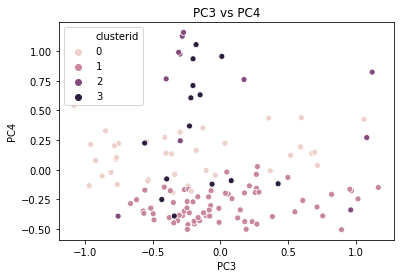

In [61]:
#Will anlayse the relationship between PC3 and PC4
sns.scatterplot(x='PC3',y='PC4',hue='clusterid',legend='full',data=Df_hc)
plt.title('PC3 vs PC4')

Text(0.5, 1.0, 'PC4 vs PC1')

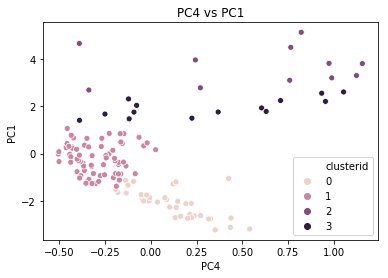

In [62]:
#Will anlayse the relationship between PC4 and PC1
sns.scatterplot(x='PC4',y='PC1',hue='clusterid',legend='full',data=Df_hc)
plt.title('PC4 vs PC1')

In [63]:
#merging the PCA dataframe with cluster id with the proginal dataframe
Df_hc_Final=pd.merge(df,Df_hc,on='country')
Df_hc_Final=Df_hc_Final[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','clusterid']]
Df_hc_Final.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,clusterid
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,1987.740,267.8950,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,1514.370,100.6050,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,1


Text(0.5, 1.0, 'gdp vs child_mort')

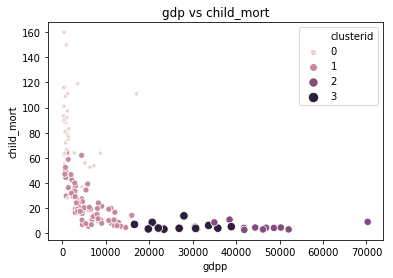

In [64]:
#Let now analyse how the clusters are formed by taking  gdp vs child_mort
sns.scatterplot(x='gdpp',y='child_mort',hue='clusterid',size='clusterid',data=Df_hc_Final)
plt.title('gdp vs child_mort')

Text(0.5, 1.0, 'income vs child_mort')

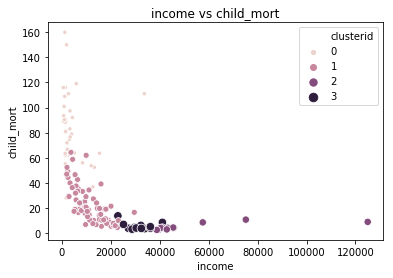

In [65]:
#Let now analyse how the clusters are formed by taking income vs child_mort
sns.scatterplot(x='income',y='child_mort',hue='clusterid',size='clusterid',data=Df_hc_Final)
plt.title('income vs child_mort')

Text(0.5, 1.0, 'income vs gdpp')

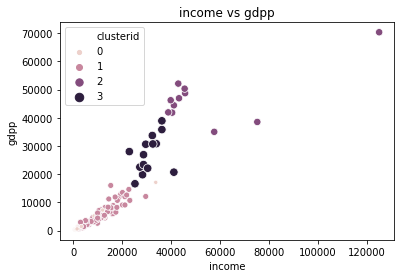

In [66]:
#Let now analyse how the clusters are formed by taking income vs gdpp
sns.scatterplot(x='income',y='gdpp',hue='clusterid',size='clusterid',data=Df_hc_Final)
plt.title('income vs gdpp')

In [67]:
#List of countries per cluster
Df_hc_Final['clusterid'].value_counts()

1    70
0    36
3    14
2    11
Name: clusterid, dtype: int64

## Analysing the cluster formed by KMeans cluster and Hierarchical clusters

With the two clusters formed, will split the data frame with respect to clusters and use it for out analysis

### Analysing KMeans clusters

In [68]:
#creating different dataframe with respect to KMamsn clusters id
Kmeans_Cluster_1=Df_Final[Df_Final['cluster_id']==0]
Kmeans_Cluster_2=Df_Final[Df_Final['cluster_id']==1]
Kmeans_Cluster_3=Df_Final[Df_Final['cluster_id']==2]
Kmeans_Cluster_4=Df_Final[Df_Final['cluster_id']==3]

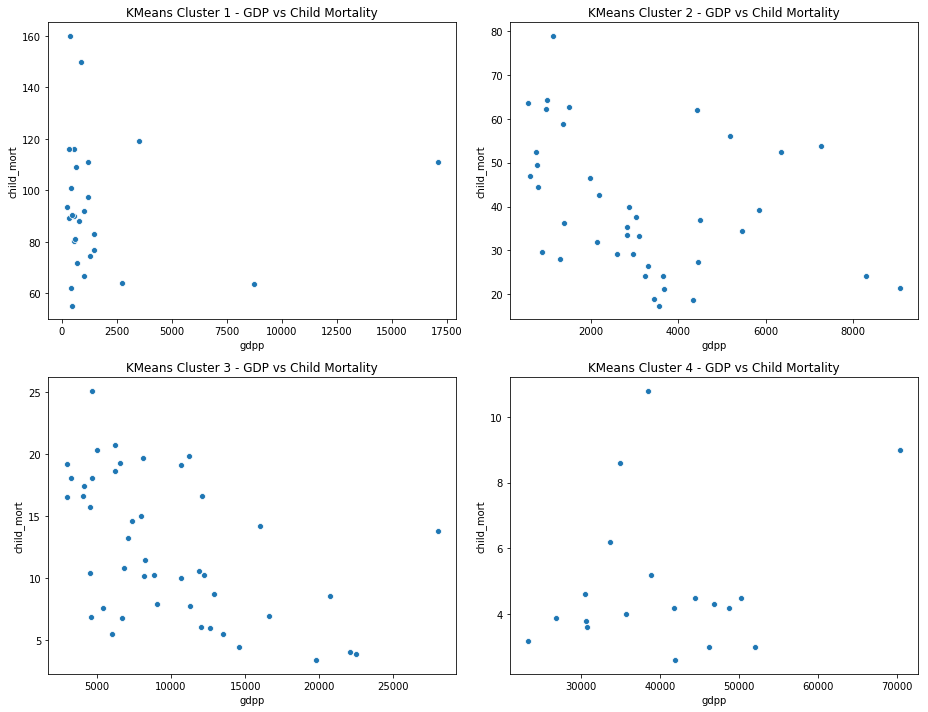

In [69]:
#Will analyse the components among all the clusters - GDP vs Child Mortality
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title('KMeans Cluster 1 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Kmeans_Cluster_1)

plt.subplot(2,2,2)
plt.title('KMeans Cluster 2 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Kmeans_Cluster_2)

plt.subplot(2,2,3)
plt.title('KMeans Cluster 3 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Kmeans_Cluster_3)

plt.subplot(2,2,4)
plt.title('KMeans Cluster 4 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Kmeans_Cluster_4)

plt.tight_layout()

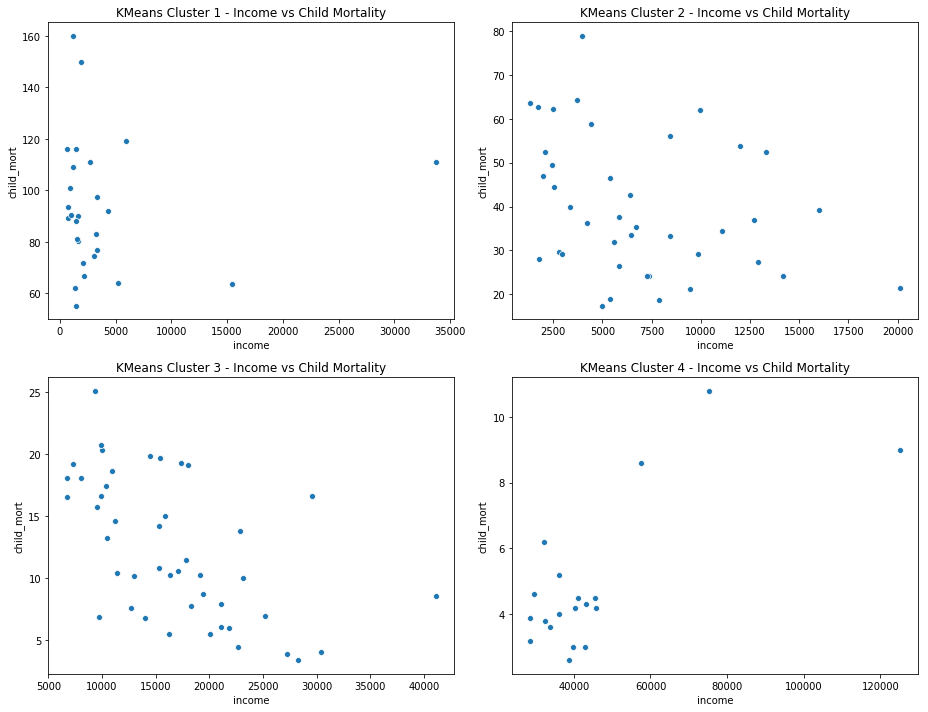

In [70]:
#Will analyse the components among all the clusters - Income vs Child Mortality
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title('KMeans Cluster 1 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Kmeans_Cluster_1)

plt.subplot(2,2,2)
plt.title('KMeans Cluster 2 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Kmeans_Cluster_2)

plt.subplot(2,2,3)
plt.title('KMeans Cluster 3 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Kmeans_Cluster_3)

plt.subplot(2,2,4)
plt.title('KMeans Cluster 4 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Kmeans_Cluster_4)

plt.tight_layout()

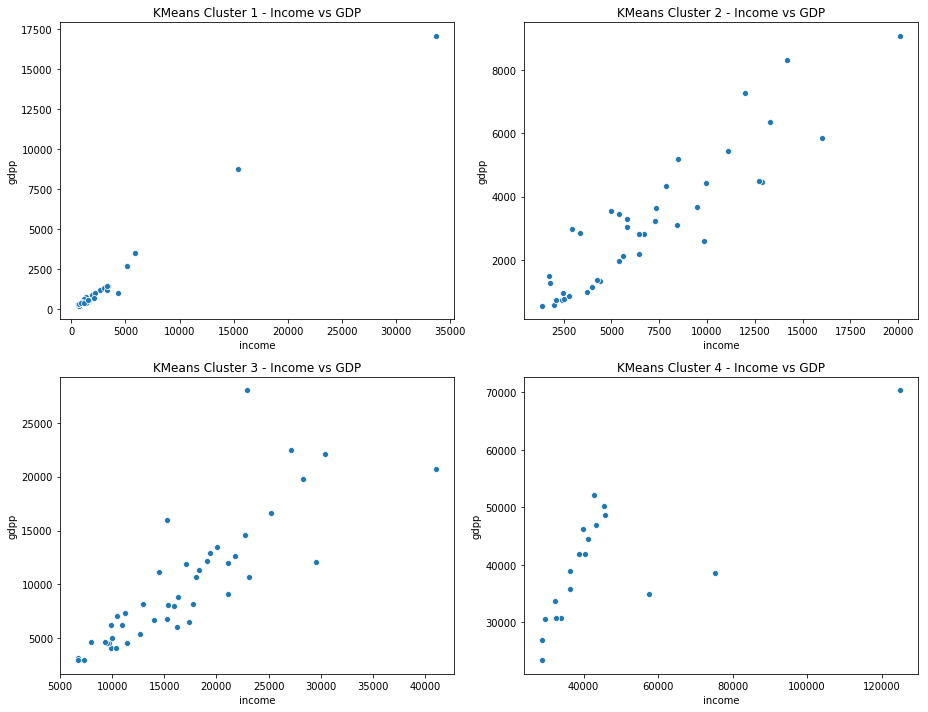

In [71]:
#Will analyse the components among all the clusters - Income vs GDP
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title('KMeans Cluster 1 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Kmeans_Cluster_1)

plt.subplot(2,2,2)
plt.title('KMeans Cluster 2 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Kmeans_Cluster_2)

plt.subplot(2,2,3)
plt.title('KMeans Cluster 3 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Kmeans_Cluster_3)

plt.subplot(2,2,4)
plt.title('KMeans Cluster 4 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Kmeans_Cluster_4)

plt.tight_layout()

### Analysing Hierarchical clusters 

In [72]:
#creating different dataframe with respect to Hierarchical clusters id
Hire_Cluster_1=Df_hc_Final[Df_hc_Final['clusterid']==0]
Hire_Cluster_2=Df_hc_Final[Df_hc_Final['clusterid']==1]
Hire_Cluster_3=Df_hc_Final[Df_hc_Final['clusterid']==2]
Hire_Cluster_4=Df_hc_Final[Df_hc_Final['clusterid']==3]

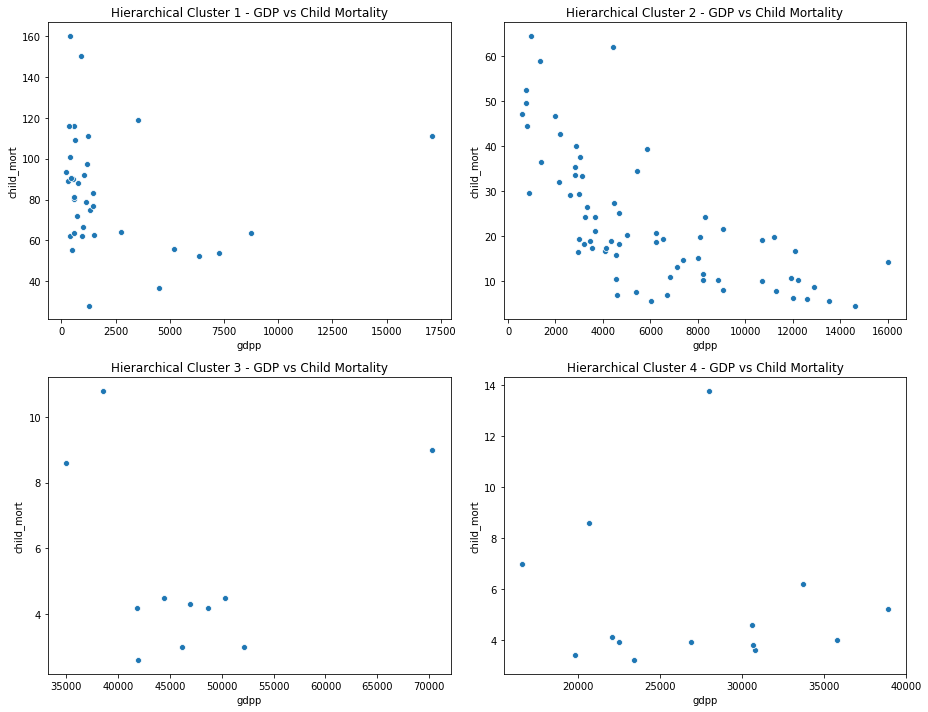

In [73]:
#Will analyse the components among all the clusters - GDP vs Child Mortality
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title('Hierarchical Cluster 1 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Hire_Cluster_1)

plt.subplot(2,2,2)
plt.title('Hierarchical Cluster 2 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Hire_Cluster_2)

plt.subplot(2,2,3)
plt.title('Hierarchical Cluster 3 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Hire_Cluster_3)

plt.subplot(2,2,4)
plt.title('Hierarchical Cluster 4 - GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=Hire_Cluster_4)

plt.tight_layout()

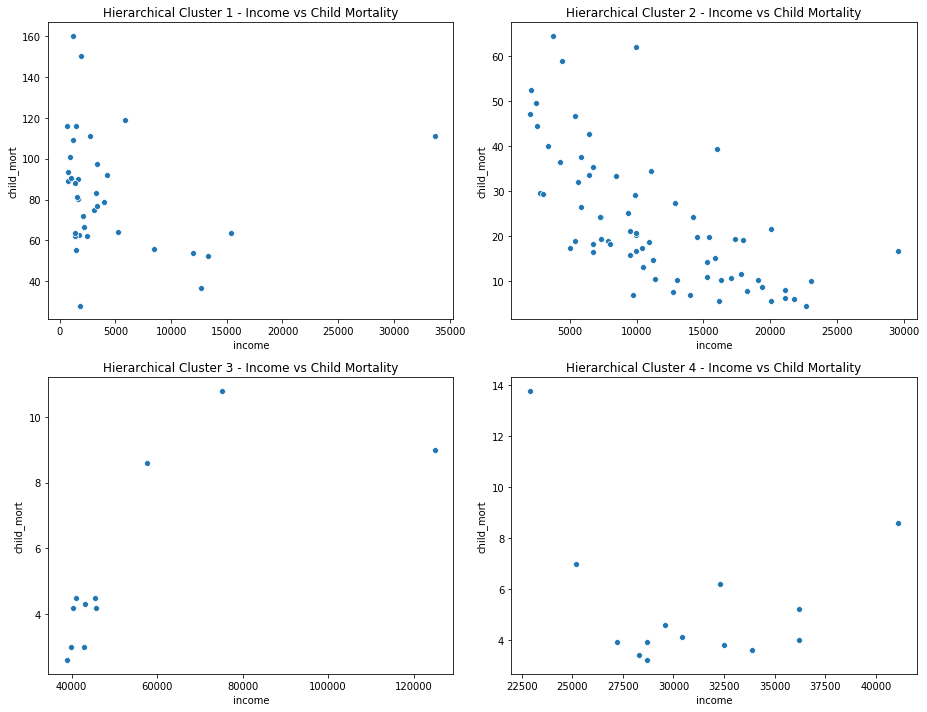

In [74]:
#Will analyse the components among all the clusters - Income vs Child Mortality
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title('Hierarchical Cluster 1 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Hire_Cluster_1)

plt.subplot(2,2,2)
plt.title('Hierarchical Cluster 2 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Hire_Cluster_2)

plt.subplot(2,2,3)
plt.title('Hierarchical Cluster 3 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Hire_Cluster_3)

plt.subplot(2,2,4)
plt.title('Hierarchical Cluster 4 - Income vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=Hire_Cluster_4)

plt.tight_layout()

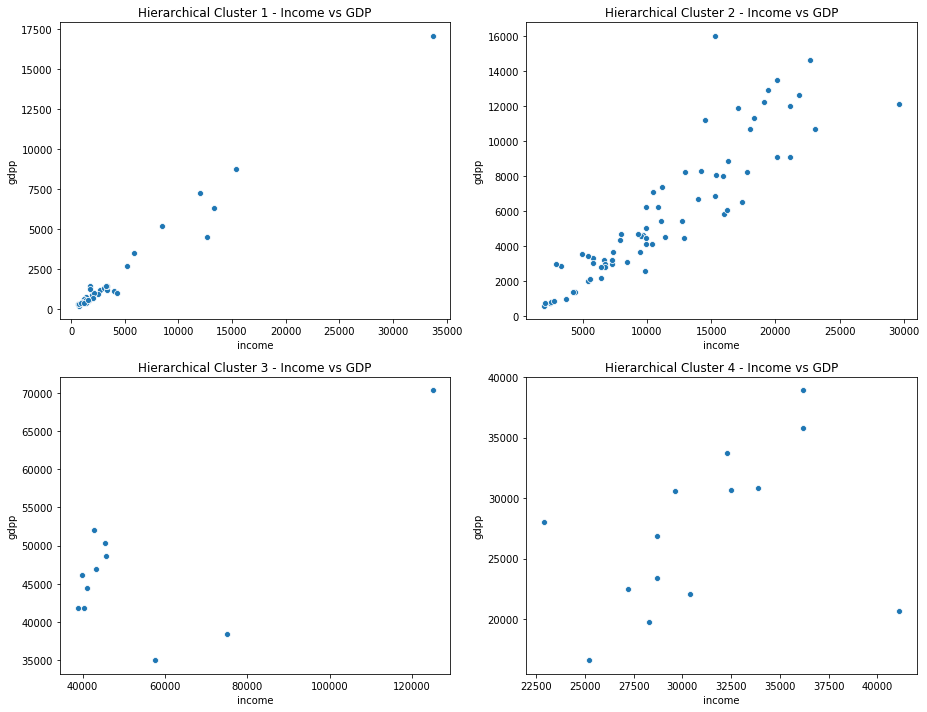

In [75]:
#Will analyse the components among all the clusters - Income vs GDP
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.title('Hierarchical Cluster 1 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Hire_Cluster_1)

plt.subplot(2,2,2)
plt.title('Hierarchical Cluster 2 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Hire_Cluster_2)

plt.subplot(2,2,3)
plt.title('Hierarchical Cluster 3 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Hire_Cluster_3)

plt.subplot(2,2,4)
plt.title('Hierarchical Cluster 4 - Income vs GDP')
sns.scatterplot(x="income", y="gdpp", data=Hire_Cluster_4)

plt.tight_layout()

#### Result analysis: 

- The K-means and Hierarchical don't produce identical insights or clusters. Hence will use the clusters formed in K-means clustering to find the countries that we require since Hierarchical clustering is not showing proper clusters and the countries are not evenly distributed between cluster in Hierarchical. 


- K-means clusters

    - `Cluster 1` - This cluster provide more meaningful insights, for e.g. in GDP vs child mortality plot, we can observe that as the GDP increase the child mortality drops or the child morality is all accumulated between GDP ~2500, which suggested that the countries in this cluster are in the need of aid first
    - `Cluster 2` - We can observe that the points are scatter all over the plot, by which we can’t derive any precise or meaningful insights
    - `Cluster 3` - We can observe that the points are accumulated towards 0, which suggest that child mortality or income or GDP is not more in these clusters. We can’t derive any precise or meaningful insights here too
    - `Cluster 4` - We can observe that the points are scatter all over the plot, by which we can’t derive any precise or meaningful insights

Will use the details we obtained form the KMeans cluster 1 to derive at the list of countries which are in need of aid

#### Note: Everytime when we execute the code data are assinging to different cluster So i am performing my analysis based on the latest cluster we have.

In [76]:
#Will try get the max GDP and lowest child mortality of the cluster 1
Kmeans_Cluster_1.sort_values(by=['gdpp'],ascending=False)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
41,Equatorial Guinea,111.0,14671.8000,10071.900,766.0800,33700,24.90,60.9,5.21,17100,0
46,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0
3,Angola,119.0,2199.1900,1514.370,100.6050,5900,22.40,60.1,6.16,3530,0
31,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
115,Sudan,76.7,291.5600,254.560,93.5360,3370,19.60,66.3,4.88,1480,0
130,Zambia,83.1,540.2000,451.140,85.9940,3280,14.00,52.0,5.40,1460,0
50,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,0
33,Cote d'Ivoire,111.0,617.3200,528.260,64.6600,2690,5.39,56.3,5.27,1220,0
82,Mauritania,97.4,608.4000,734.400,52.9200,3320,18.90,68.2,4.98,1200,0
93,Pakistan,92.1,140.4000,201.760,22.8800,4280,10.90,65.3,3.85,1040,0


In [77]:
#Will try get the max GDP and lowest child mortality of the cluster 1
Kmeans_Cluster_1.sort_values(by=['child_mort'],ascending=True)

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,cluster_id
42,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
78,Madagascar,62.2,103.2500,177.590,15.5701,1390,8.79,60.8,4.60,413,0
46,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0
31,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
105,Senegal,66.8,249.0000,403.000,56.6000,2180,1.85,64.0,5.06,1000,0
119,Tanzania,71.9,131.2740,204.282,42.1902,2090,9.25,59.3,5.43,702,0
50,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,0
115,Sudan,76.7,291.5600,254.560,93.5360,3370,19.60,66.3,4.88,1480,0
47,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
124,Uganda,81.0,101.7450,170.170,53.6095,1540,10.60,56.8,6.15,595,0


- The lowest child mortality of cluster 1 is 55.2
- The Max GDP of cluster 1 is 17100

Now will use the above details to derive at the list of countries from the original data frame.

We use the original data frame to obtain the list of countries because we have removed few countries while treating the outliers. So, there are chances here that we might of removed the country with extreme child mortality or any country which are in need of aid

In [78]:
#reading the original data frame
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [79]:
#let's filter the dataset with 17100 as the cut-off limit for gdpp.
df_gdp = df[df['gdpp']<=17100]
df_gdp.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [80]:
#let's filter the dataset with child mortality greater than 55.2
df_gdp_cm = df_gdp[df_gdp['child_mort']>=55.2]
df_gdp_cm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231


In [81]:
#Counting the number of countries which are in need of aid
len(df_gdp_cm)

47

In [82]:
df_gdp_cm.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,93.857447,821.899913,85.743751,727.775151,3518.361702,11.731596,59.661702,4.961489,1680.851064
std,32.242908,2283.329458,126.306474,1514.707514,5239.428061,15.553125,6.577120,1.108271,2765.543330
min,55.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.410000,231.000000
25%,64.150000,101.515500,31.962100,185.067000,1390.000000,3.715000,57.050000,4.440000,550.000000
50%,90.200000,180.404000,46.495000,302.802000,1870.000000,8.790000,60.400000,5.060000,897.000000
75%,111.000000,398.280000,68.120000,545.140000,3545.000000,16.350000,63.900000,5.635000,1330.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000


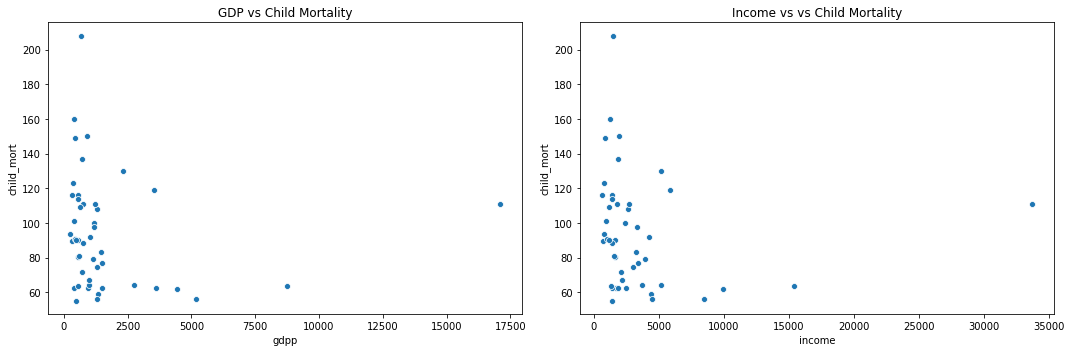

In [83]:
#Will have a quick veiw how the final list looks live with GDP and Income vs child mortality
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('GDP vs Child Mortality')
sns.scatterplot(x="gdpp", y="child_mort", data=df_gdp_cm)

plt.subplot(1,2,2)
plt.title('Income vs vs Child Mortality')
sns.scatterplot(x="income", y="child_mort", data=df_gdp_cm)

plt.tight_layout()

The above plot suggests the data the list of countries we filter are in the need of aid as their income and GDP is very low and the child mortality is very high

Will sort the final list of countries with highest to lowest child mortality rate which will help us to prioritise the most need first

In [84]:
#Will sort the final list of countries with highest to lowest child mortality rate 
df_gdp_cm.sort_values(by=['child_mort'], ascending = False)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.28600,45.7442,428.314000,1500,5.450,32.1,3.33,662
132,Sierra Leone,160.0,67.03200,52.2690,137.655000,1220,17.200,55.0,5.20,399
32,Chad,150.0,330.09600,40.6341,390.195000,1930,6.390,56.5,6.59,897
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888,2.010,47.5,5.21,446
97,Mali,137.0,161.42400,35.2584,248.508000,1870,4.370,59.5,6.55,708
113,Nigeria,130.0,589.49000,118.1310,405.420000,5150,104.000,60.5,5.84,2330
112,Niger,123.0,77.25600,17.9568,170.868000,814,2.550,58.8,7.49,348
3,Angola,119.0,2199.19000,100.6050,1514.370000,5900,22.400,60.1,6.16,3530
25,Burkina Faso,116.0,110.40000,38.7550,170.200000,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,137.27400,26.4194,165.664000,609,20.800,57.5,6.54,334
